# Forecasting

### Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model ### explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [2]:
data=pd.read_excel("C:\\Users\\Dell\\Downloads\\CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


### Visualisation

<AxesSubplot:>

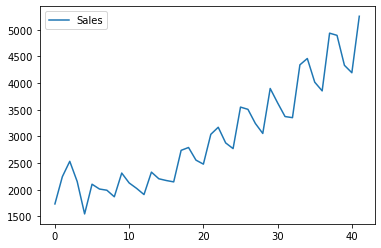

In [4]:
data.plot()

<AxesSubplot:>

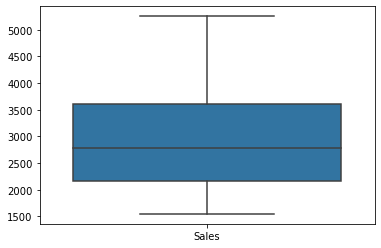

In [5]:
sns.boxplot(data=data)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


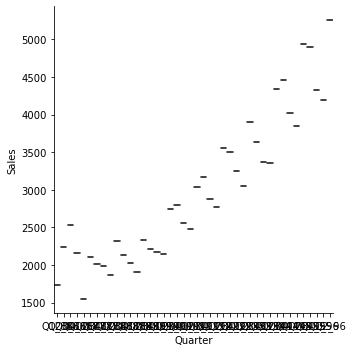

In [6]:
sns.factorplot("Quarter","Sales",data=data,kind="box")

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

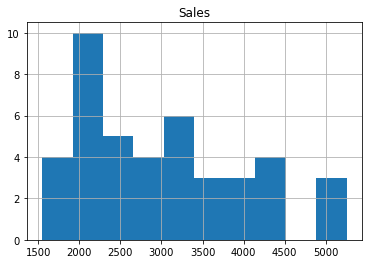

In [7]:
data.hist()

<AxesSubplot:ylabel='Density'>

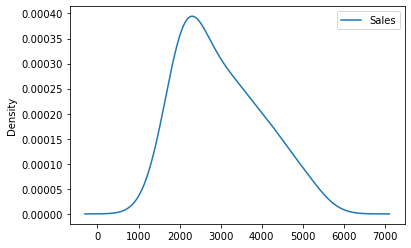

In [8]:
data.plot(kind="kde")

In [9]:
np.array(data["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


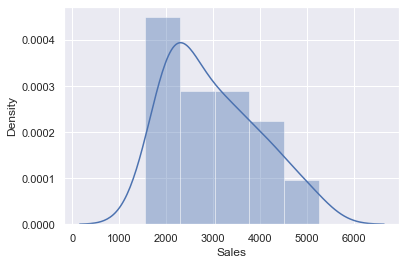

In [10]:
sns.set_theme()
rk=sns.distplot(data['Sales'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

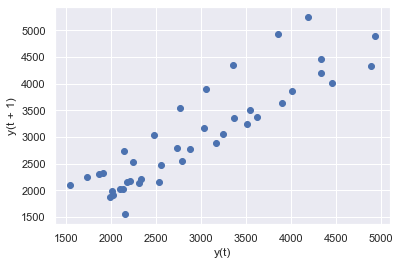

In [11]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])

In [12]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [13]:
len(data)

42

In [14]:
data['quarter']=0
for i in range(42):
    p=data['Quarter'][i]
    data['quarter'][i]=p[0:2]

C:\Users\Dell\AppData\Local\Temp\ipykernel_8784\250584251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=p[0:2]


In [15]:
data

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [16]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [17]:
data_dummies=pd.DataFrame(pd.get_dummies(data['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([data,data_dummies],axis=1)

In [18]:
data.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [19]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [20]:
cc['t']=np.arange(1,43)
cc['t_squared']=cc['t']**2
cc['Sales_log']=np.log(data['Sales'])

In [21]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [22]:
train=data.head(48)
test=data.tail(12)

<AxesSubplot:>

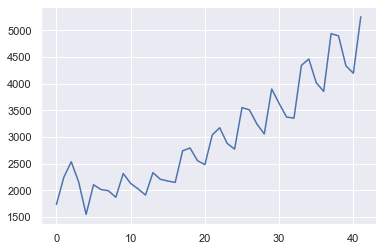

In [23]:
data['Sales'].plot()

In [24]:
#Models

In [25]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [29]:
# Using ARIIMA Model

In [30]:
data=pd.read_excel("C:\\Users\\Dell\\Downloads\\CocaCola_Sales_Rawdata.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [31]:
#seperate out a validation dataset
split_point=len(data)-7
dataset_cc,validation_cc=data[0:split_point],data[split_point:]
print('Dataset_cc %d,Validation_cc %d' % (len(dataset_cc),len(validation_cc)))

Dataset_cc 35,Validation_cc 7


In [32]:
dataset_cc.to_csv('dataset_cc.csv',header=False)
validation_cc.to_csv('validation_cc.csv',header=False)

In [33]:
from pandas import read_csv
from math import sqrt

In [34]:
train=read_csv('dataset_cc.csv',header=None, index_col=0,parse_dates=True,squeeze=True)
train

C:\Users\Dell\AppData\Local\Temp\ipykernel_8784\1182064172.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train=read_csv('dataset_cc.csv',header=None, index_col=0,parse_dates=True,squeeze=True)


,1,2
0,,
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999


In [35]:
X=train.values
#X=X.astype('float32')
train_size=int(len(X)*0.50)
train,test=X[0:train_size],X[train_size:]

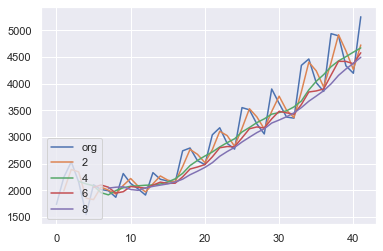

In [40]:
data.Sales.plot(label="org")
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=3)

##### ACF plots and PACF plots on original dataset

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


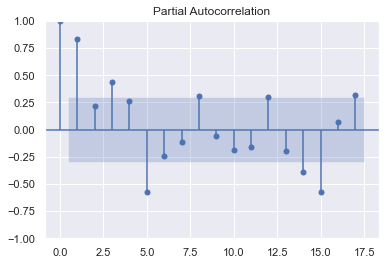

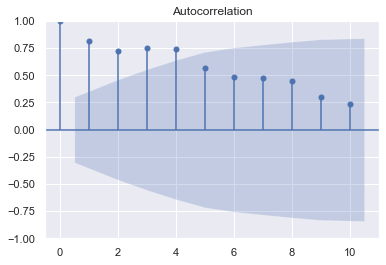

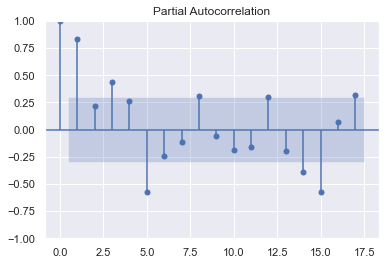

In [41]:
tsa_plots.plot_acf(data.Sales,lags=10)
tsa_plots.plot_pacf(data.Sales)

In [42]:
train=data.head(48)
test=data.tail(12)

##### creating a function to calculate the MAPE value for test data

In [43]:
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

#### Simple Exponential Method

In [44]:
ses_model=SimpleExpSmoothing(train["Sales"]).fit()
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

9.681026212917489

#### Holt method

In [45]:
ho_model=Holt(train["Sales"]).fit()
pred_ho=ho_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ho,test.Sales)

11.025182503719508

#### Holts Winter Exponential Smoothing with additive seasonality and additive trend

In [46]:
hwe_model_add_add=ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_add_add,test.Sales)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8784\473715742.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hwe_model_add_add=ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()


3.4316431235582012

#### Holts Winter Exponential Smoothing with multiplicative seasonality and additive trend

In [47]:
hwe_model_mul_add=ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add=hwe_model_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

3.4316431235582012

#### visualisation for forecasted values for test data set using different methods

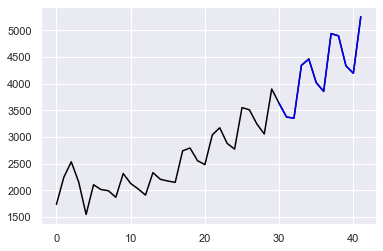

In [48]:
plt.plot(train.index,train["Sales"],label='train',color="black")
plt.plot(test.index,test["Sales"],label='train',color="blue")

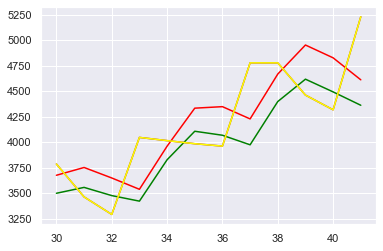

In [49]:
plt.plot(pred_ses.index,pred_ses,label='SimpleExponential',color="green")
plt.plot(pred_ho.index,pred_ho,label='HOlts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")


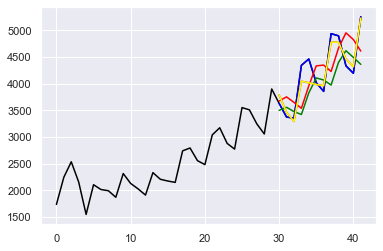

In [50]:
plt.plot(train.index,train["Sales"],label='train',color="black")
plt.plot(test.index,test["Sales"],label='train',color="blue")
plt.plot(pred_ses.index,pred_ses,label='SimpleExponential',color="green")
plt.plot(pred_ho.index,pred_ho,label='HOlts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")